In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import log_loss


### Import Dataset

In [2]:
data = pd.read_csv("wdbc.data", header=None)
data2 = data.iloc[:,2:32]

### Normalize Data

In [3]:
scaler = MinMaxScaler()
normalizeDT = scaler.fit_transform(data2)
normalizeDF = pd.DataFrame(normalizeDT, columns=data2.columns)
normalizeDF['Target'] = data.iloc[:, 1]

###  Using Spearmanr Algorithm for analyse correlations data and select more important features

In [4]:
y = normalizeDF.iloc[:, -1]
correlations = normalizeDF.iloc[:, :30].apply(lambda x: spearmanr(x, y)[0])
correlations = correlations.abs().sort_values(ascending=False)
top_variables = correlations.head(10).index
print(top_variables)
top_variables = [24, 22, 25, 29, 9, 4, 5, 8, 2, 15]
df = normalizeDF[top_variables]
targetValue = normalizeDF.columns[-1]
top_variables.append(targetValue)
df = normalizeDF[top_variables]
display(df)

Index([24, 22, 25, 29, 9, 4, 5, 8, 2, 15], dtype='object')


,24,22,25,29,9,4,5,8,2,15,Target
0,0.668310,0.620776,0.450698,0.912027,0.731113,0.545989,0.363733,0.703140,0.521037,0.273811,M
1,0.539818,0.606901,0.435214,0.639175,0.348757,0.615783,0.501591,0.203608,0.643144,0.125660,M
2,0.508442,0.556386,0.374508,0.835052,0.635686,0.595743,0.449417,0.462512,0.601496,0.162922,M
3,0.241347,0.248310,0.094008,0.884880,0.522863,0.233501,0.102906,0.565604,0.210090,0.038155,M
4,0.506948,0.519744,0.341575,0.558419,0.518390,0.630986,0.489290,0.463918,0.629893,0.163688,M
...,...,...,...,...,...,...,...,...,...,...,...
564,0.576174,0.623266,0.452664,0.761512,0.690358,0.678668,0.566490,0.571462,0.690000,0.283710,M
565,0.520892,0.560655,0.379915,0.559450,0.486630,0.604036,0.474019,0.337395,0.622320,0.172279,M
566,0.379949,0.393099,0.230731,0.487285,0.263519,0.445788,0.303118,0.216753,0.455251,0.077976,M
567,0.668310,0.633582,0.402035,0.910653,0.755467,0.665538,0.475716,0.823336,0.644564,0.148335,M


### Extracting the values 

In [5]:
data_n=df.values

X = data_n[:,:10]
#print(XTrain)
y = data_n[:,-1]
# print(y)

y = (y=="M").astype(int)

X.shape, y.shape



((569, 10), (569,))

### Divide data in Training, Test and Validation data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0, shuffle=True)

### Ploting Data

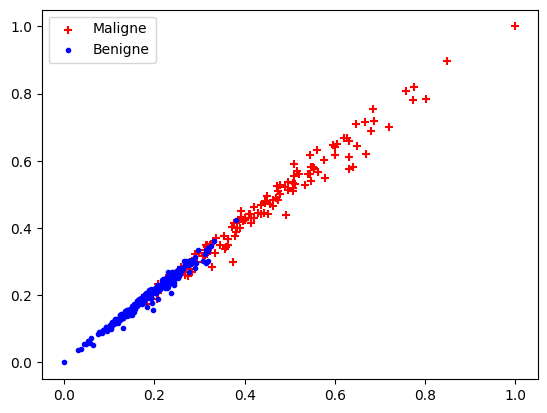

In [7]:
YTrain = y_train.reshape((X_train.shape[0],1))

ben = (YTrain==0)
mal = (YTrain==1)

plt.scatter(X_train[mal[:,0],0], X_train[mal[:,0],1], c='r', marker="+")
plt.scatter(X_train[ben[:,0],0], X_train[ben[:,0],1], c='b', marker='.')

plt.legend(['Maligne', 'Benigne'])

### Create a dictionary for several C values to find the best C for our model

In [8]:
LogC = {
    'C':[0.00001,0.0001,0.001,0.01,0.1,1,5,10,12,15,20,22]
}


model = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000)

LogRegressionCV = GridSearchCV(estimator=model, param_grid=LogC, cv=4, scoring='accuracy', verbose=3)
LogRegressionCV.fit(X_train, y_train)
loss_values = []



Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV 1/4] END ...........................C=1e-05;, score=0.637 total time=   0.0s
[CV 2/4] END ...........................C=1e-05;, score=0.648 total time=   0.0s
[CV 3/4] END ...........................C=1e-05;, score=0.648 total time=   0.0s
[CV 4/4] END ...........................C=1e-05;, score=0.648 total time=   0.0s
[CV 1/4] END ..........................C=0.0001;, score=0.637 total time=   0.0s
[CV 2/4] END ..........................C=0.0001;, score=0.648 total time=   0.0s
[CV 3/4] END ..........................C=0.0001;, score=0.648 total time=   0.0s
[CV 4/4] END ..........................C=0.0001;, score=0.648 total time=   0.0s
[CV 1/4] END ...........................C=0.001;, score=0.637 total time=   0.0s
[CV 2/4] END ...........................C=0.001;, score=0.648 total time=   0.0s
[CV 3/4] END ...........................C=0.001;, score=0.648 total time=   0.0s
[CV 4/4] END ...........................C=0.001;

### Finded our best C value

In [9]:
bestC = LogRegressionCV.best_params_['C']
bestLambda = 1/bestC

### Apply our model with parameters to regularization and best C 

In [10]:
modelTest = LogisticRegression(solver='liblinear', penalty='l1',C=bestC, max_iter=1000)
modelTest.fit(X_train, y_train)


LogisticRegression(C=15, max_iter=1000, penalty='l1', solver='liblinear')

### Calculate train, test and validation predictions 

In [11]:
#Train ACcuracy
train_predictions = modelTest.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)


In [12]:
validation_predictions = modelTest.predict(X_val)
validation_accuracy = accuracy_score(y_val, validation_predictions)
print(validation_accuracy)

0.978021978021978


In [13]:
test_predict = modelTest.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predict)


### Plot how we know the best C

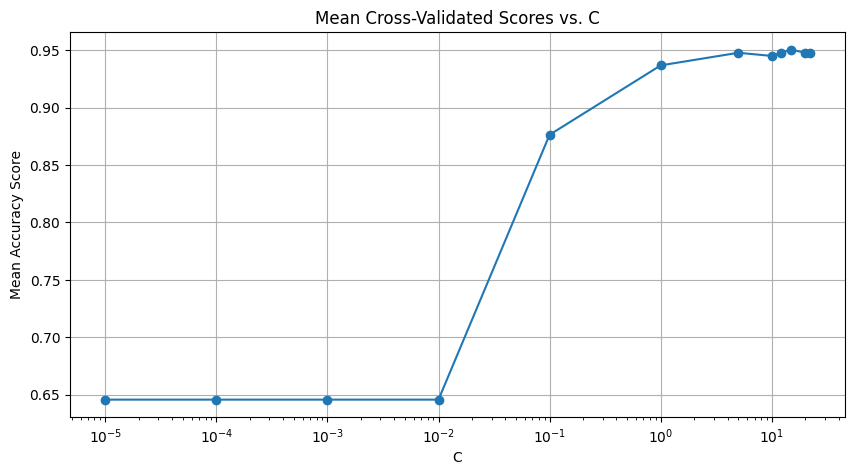

In [14]:
mean_scores = np.array(LogRegressionCV.cv_results_['mean_test_score'])

plt.figure(figsize=(10, 5))
plt.plot(LogC['C'], mean_scores, marker='o')
plt.title('Mean Cross-Validated Scores vs. C')
plt.xlabel('C')
plt.ylabel('Mean Accuracy Score')
plt.xscale('log')  
plt.grid()
plt.show()



### Results Resume

In [15]:
results = {
    'Model': [],
    'C': [],
    'Lambda' : [],
    'Dataset': [],
    'Accuracy': []
}

results['Model'].append('Logistic Regression')
results['C'].append(bestC)
results['Lambda'].append(bestLambda)
results['Dataset'].append('Training Set')
results['Accuracy'].append(train_accuracy)

results['Model'].append('Logistic Regression')
results['C'].append(bestC)
results['Lambda'].append(bestLambda)
results['Dataset'].append('Test Set')
results['Accuracy'].append(test_accuracy)

results['Model'].append('Logistic Regression')
results['C'].append(bestC)
results['Lambda'].append(bestLambda)
results['Dataset'].append('Validation Set')
results['Accuracy'].append(validation_accuracy)


df = pd.DataFrame(results)

display(df)

,Model,C,Lambda,Dataset,Accuracy
0,Logistic Regression,15,0.066667,Training Set,0.958791
1,Logistic Regression,15,0.066667,Test Set,0.947368
2,Logistic Regression,15,0.066667,Validation Set,0.978022


### Confusion Matrix

In [16]:
validation_confusion_matrix = confusion_matrix(y_val, validation_predictions)

test_confusion_matrix = confusion_matrix(y_test, test_predict)

train_confusion_matrix = confusion_matrix(y_train, train_predictions)

print("Confusion Matrix for Validation Dataset:")
print(validation_confusion_matrix)

print("Confusion Matrix for Test Dataset:")
print(test_confusion_matrix)

print("Confusion Matrix for Train Dataset:")
print(train_confusion_matrix)

Confusion Matrix for Validation Dataset:
[[53  2]
 [ 0 36]]
Confusion Matrix for Test Dataset:
[[64  3]
 [ 3 44]]
Confusion Matrix for Train Dataset:
[[229   6]
 [  9 120]]


In [17]:
validation_accuracy = (validation_confusion_matrix[0, 0] + validation_confusion_matrix[1, 1]) / np.sum(validation_confusion_matrix) * 100
validation_specificity = (validation_confusion_matrix[0, 0] / (validation_confusion_matrix[0, 0] + validation_confusion_matrix[0, 1])) * 100
validation_sensitivity = (validation_confusion_matrix[1, 1] / (validation_confusion_matrix[1, 0] + validation_confusion_matrix[1, 1])) * 100


test_accuracy = (test_confusion_matrix[0, 0] + test_confusion_matrix[1, 1]) / np.sum(test_confusion_matrix) * 100
test_specificity = (test_confusion_matrix[0, 0] / (test_confusion_matrix[0, 0] + test_confusion_matrix[0, 1])) * 100
test_sensitivity = (test_confusion_matrix[1, 1] / (test_confusion_matrix[1, 0] + test_confusion_matrix[1, 1])) * 100

train_accuracy = (train_confusion_matrix[0, 0] + train_confusion_matrix[1, 1]) / np.sum(train_confusion_matrix) * 100
train_specificity = (train_confusion_matrix[0, 0] / (train_confusion_matrix[0, 0] + train_confusion_matrix[0, 1])) * 100
train_sensitivity = (train_confusion_matrix[1, 1] / (train_confusion_matrix[1, 0] + train_confusion_matrix[1, 1])) * 100

data = {
    'Dataset': ['Training', 'Test', 'Validation'],
    'Accuracy (%)': [train_accuracy, validation_accuracy, test_accuracy],
    
    'Sensitivity (%)': [train_sensitivity, validation_sensitivity, test_sensitivity],
    'Specificity (%)': [train_specificity, validation_specificity, test_specificity]
}

res = pd.DataFrame(data)
res.set_index('Dataset', inplace=True)
display(res)

,Accuracy (%),Sensitivity (%),Specificity (%)
Dataset,,,
Training,95.879121,93.023256,97.446809
Test,97.802198,100.000000,96.363636
Validation,94.736842,93.617021,95.522388


### Here we have sum plots that helps understanding the model

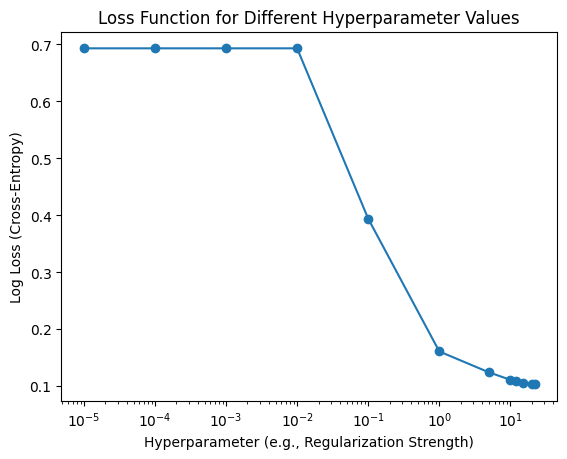

In [18]:
for hyperparameter in LogC['C']:
    model = LogisticRegression(C=hyperparameter, solver='liblinear', penalty='l1', max_iter=1000)
    
    model.fit(X_train, y_train)
    
    y_pred_proba = model.predict_proba(X_train)
    
    loss = log_loss(y_train, y_pred_proba)
    
    loss_values.append(loss)

plt.plot(LogC['C'], loss_values, marker='o')
plt.xlabel('Hyperparameter (e.g., Regularization Strength)')
plt.ylabel('Log Loss (Cross-Entropy)')
plt.title('Loss Function for Different Hyperparameter Values')
plt.xscale('log')  # Use a logarithmic scale for the x-axis if needed
plt.show()

In [19]:
def get_accuracy(conf_matrix):
    tn, fp, fn, tp = np.ravel(conf_matrix)
    return (tp + tn) / (tp + tn + fp + fn)

def get_precision(conf_matrix):
    tn, fp, fn, tp = np.ravel(conf_matrix)
    return tp / (tp + fp)

def get_sensitivity(conf_matrix):
    tn, fp, fn, tp = np.ravel(conf_matrix)
    return tp / (tp + fn)
def get_specificity(conf_matrix):
    tn, fp, fn, tp = np.ravel(conf_matrix)
    return tn / (tn + fp + 1e-10)
def conf_matrix(mat):
    res = {"acc":get_accuracy(mat),"sen":get_sensitivity(mat),"spe":get_specificity(mat)}
    return pd.DataFrame(res, index=[0])

def calculate_y_hat(x, model):
    y_hat_result = model.predict(x)
    y_hat_result = [0 if i < 0.5 else 1 for i in y_hat_result]
    return y_hat_result

def full_conf_matrix(x_test, x_val, x_train, y_test, y_val, y_train, model):
    res = pd.DataFrame()
    y_hat_test = calculate_y_hat(x_test, model)
    conf_test = tuple(confusion_matrix(y_test, y_hat_test).reshape(1, 4)[0])
    res = res.append(conf_matrix(conf_test))

    y_hat_train = calculate_y_hat(x_train, model)
    conf_train = tuple(confusion_matrix(y_train, y_hat_train).reshape(1, 4)[0])
    res = res.append(conf_matrix(conf_train))

    y_hat_val = calculate_y_hat(x_val, model)
    conf_val = tuple(confusion_matrix(y_val, y_hat_val).reshape(1, 4)[0])
    res = res.append(conf_matrix(conf_val))

    res.index = ["test","train","val"]

    return res
def mean_df(df):
    arr1 = df.iloc[0:3].to_numpy()
    arr2 = df.iloc[3:6].to_numpy()
    arr3 = df.iloc[6:9].to_numpy()
    arr4 = df.iloc[9:].to_numpy()
    # Compute the mean along the corresponding cells
    mean_array = (arr1 + arr2 + arr3+ arr4 ) / 4

    # Create a new DataFrame from the mean NumPy array
    return pd.DataFrame(mean_array, index=df.iloc[0:3].index, columns=df.iloc[0:3].columns)
